In [59]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import patches

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.eddy_feedback as ef
import functions.data_wrangling as data

In [50]:
# ep_fluxes = xr.open_mfdataset('/badc/srip/data/zonal/common_grid/era_interim/TEM_monthly*')
# ucomp = xr.open_mfdataset('/badc/srip/data/zonal/common_grid/era_interim/ZMD_monthly*')
# era = xr.Dataset( {'epfy': ep_fluxes['EPF_phi_pr'], 'divF': ep_fluxes['EPFD_phi_pr'], 'ubar': ucomp.u } )
# era.to_netcdf('./era_TEM_epfy_divF_ubar.nc')
era = xr.open_mfdataset('./era_TEM_epfy_divF_ubar.nc')

## NH Winter (DJF)

In [51]:
era_djf = data.seasonal_mean(era, season='djf')
era_djf = era_djf.sel(level=slice(925, 50))
era_djf = era_djf.sel(lat=slice(0,87.5))

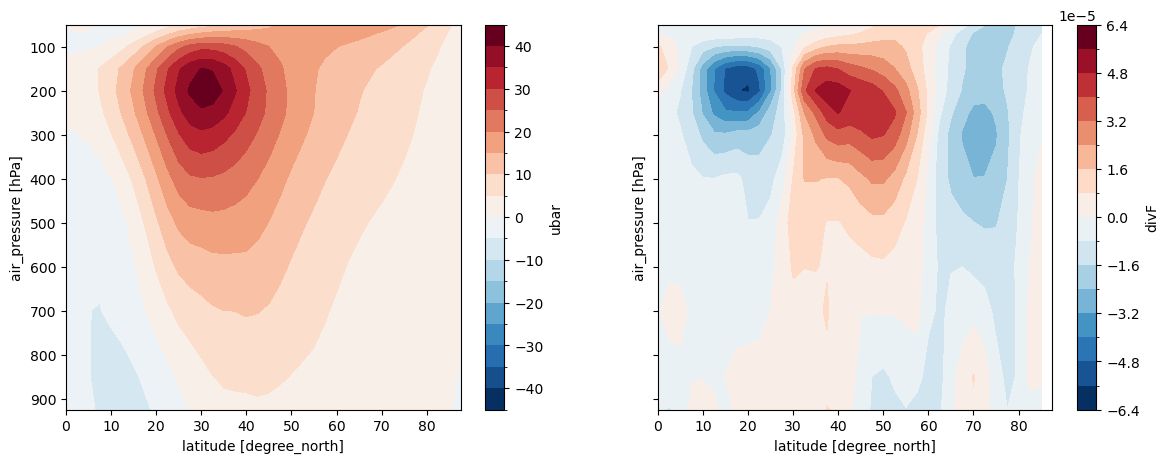

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14,5))

era_djf.ubar.mean('time').plot.contourf(ax=ax1, levels=20, yincrease=False)
era_djf.divF.mean('time').plot.contourf(ax=ax2, levels=20, yincrease=False)

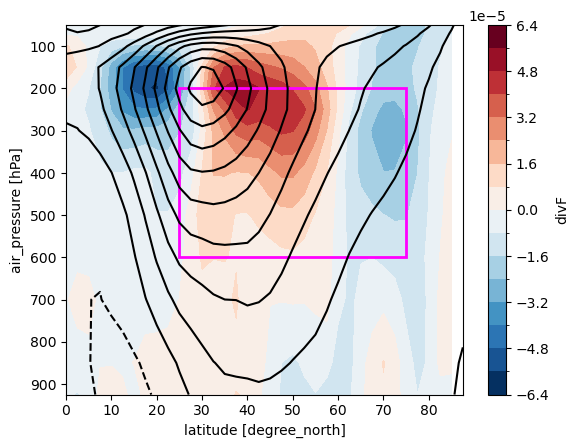

In [63]:
era_djf.divF.mean('time').plot.contourf(levels=20, yincrease=False)
era_djf.ubar.mean('time').plot.contour(levels=20, yincrease=False, colors='k')

rect = patches.Rectangle((25.,600.), 50, -400,
                         fill=False, linewidth=2, color='magenta')
plt.gca().add_patch(rect)

## SH Winter (JAS)

In [55]:
era_jas = data.seasonal_mean(era, season='jas')
era_jas = era_jas.sel(level=slice(925, 50))
era_jas = era_jas.sel(lat=slice(-87.5, 0))
era_jas

<xarray.Dataset>
Dimensions:  (time: 38, level: 13, lat: 36)
Coordinates:
  * level    (level) float32 925.0 850.0 700.0 600.0 ... 150.0 100.0 70.0 50.0
  * lat      (lat) float32 -87.5 -85.0 -82.5 -80.0 -77.5 ... -7.5 -5.0 -2.5 0.0
  * time     (time) int64 1979 1980 1981 1982 1983 ... 2012 2013 2014 2015 2016
Data variables:
    epfy     (time, level, lat) float32 dask.array<chunksize=(38, 13, 36), meta=np.ndarray>
    divF     (time, level, lat) float32 dask.array<chunksize=(38, 13, 36), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(38, 13, 36), meta=np.ndarray>

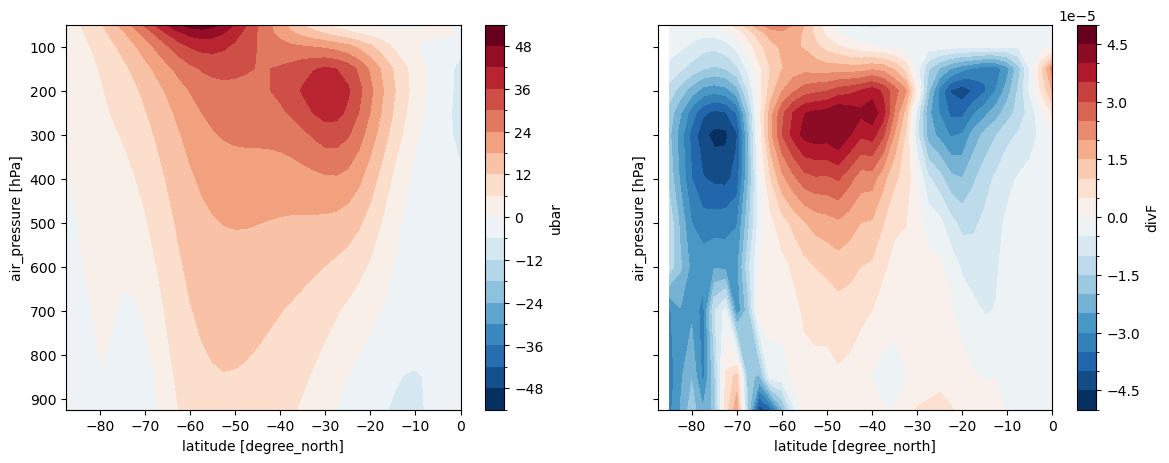

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14,5))

era_jas.ubar.mean('time').plot.contourf(ax=ax1, levels=20, yincrease=False)
era_jas.divF.mean('time').plot.contourf(ax=ax2, levels=20, yincrease=False)

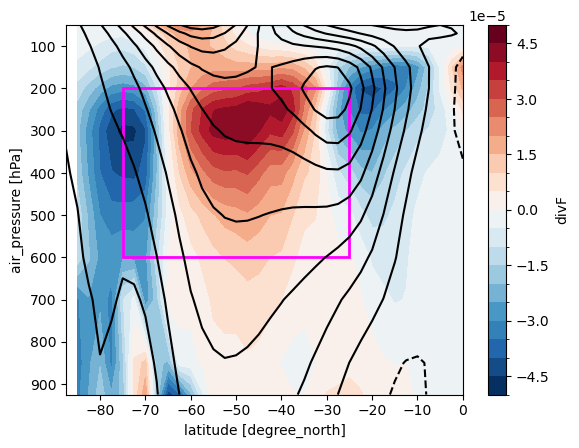

In [66]:
era_jas.divF.mean('time').plot.contourf(levels=20, yincrease=False)
era_jas.ubar.mean('time').plot.contour(levels=20, yincrease=False, colors='k')

rect = patches.Rectangle((-25.,600.), -50, -400,
                         fill=False, linewidth=2, color='magenta')
plt.gca().add_patch(rect)